In [1]:
import os
from sklearn.feature_extraction.text import 

from sklearn.ensemble import RandomForestClassifier
from Word2VecUtility import Word2VecUtility
import pandas as pd
import numpy as np
import glob
import nltk
import xmltodict



In [2]:
nltk.download(['stopwords','wordnet'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanespe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juanespe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
with open('../xml_parser/papers-dc.xml') as fd:
    doc = xmltodict.parse(fd.read())

In [4]:
def id_doc(record):
    return record['header']['identifier'].split(":")[2]

In [6]:
def string_to_array(elem):
    if(isinstance(elem, str)):
        return([elem])
    else:
        return elem

In [7]:
def document_meta_data(record):
    return ','.join(map(str,[record['metadata']['oai_dc:dc']['dc:title'],
        ', '.join(map(str,string_to_array(record['metadata']['oai_dc:dc']['dc:subject'])))]))

In [8]:
def build_data(d):
    values = dict()
    for a in d['OAI-PMH']['ListRecords']['record']:
        values[id_doc(a)] = document_meta_data(a)
    return values

In [9]:
h = build_data(doc)

In [10]:
h

{'0704.3504': "Smooth R\\'enyi Entropy of Ergodic Quantum Information Sources,Quantum Physics, Computer Science - Information Theory",
 '0706.1402': 'Analyzing Design Process and Experiments on the AnITA Generic Tutoring\n  System,Computer Science - Computers and Society, Computer Science - Human-Computer Interaction',
 '0710.0736': 'Colour image segmentation by the vector-valued Allen-Cahn phase-field\n  model: a multigrid solution,Computer Science - Computer Vision and Pattern Recognition, Computer Science - Numerical Analysis, I.4.6, G.1.8',
 '0803.2570': 'Unequal Error Protection: An Information Theoretic Perspective,Computer Science - Information Theory, Computer Science - Discrete Mathematics, Mathematics - Combinatorics',
 '0808.0084': 'On the hitting times of quantum versus random walks,Quantum Physics, Computer Science - Data Structures and Algorithms',
 '0811.1254': 'Coding Theory and Algebraic Combinatorics,Mathematics - Combinatorics, Computer Science - Information Theory',

In [11]:
clean_train_words = []

for key, value in h.items():
    clean_train_words.append(" ".join(Word2VecUtility.review_to_wordlist(value, True)))
    

/Users/juanespe/projects/master_on_data_science/fundamentos_en_ciencias_de_los_datos/text-mining-applied-project/second_approach/Word2VecUtility.py:28: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 28 of the file /Users/juanespe/projects/master_on_data_science/fundamentos_en_ciencias_de_los_datos/text-mining-applied-project/second_approach/Word2VecUtility.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  review_text = BeautifulSoup(review).get_text()


In [12]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = None)

In [13]:
train_data_features = vectorizer.fit_transform(clean_train_words)

print(train_data_features)

  (0, 1856)	1
  (0, 1606)	1
  (0, 323)	1
  (0, 1323)	1
  (0, 1705)	1
  (0, 894)	2
  (0, 1440)	2
  (0, 603)	1
  (0, 582)	1
  (0, 586)	1
  (0, 1685)	1
  (1, 914)	1
  (1, 837)	1
  (1, 1691)	1
  (1, 1819)	1
  (1, 1917)	1
  (1, 737)	1
  (1, 62)	1
  (1, 626)	1
  (1, 1393)	1
  (1, 467)	1
  (1, 56)	1
  (1, 1606)	2
  (1, 323)	4
  (2, 53)	1
  :	:
  (977, 323)	2
  (978, 420)	1
  (978, 1338)	1
  (978, 2015)	1
  (978, 1790)	1
  (978, 775)	1
  (978, 72)	1
  (978, 287)	1
  (978, 1856)	1
  (978, 1606)	1
  (978, 323)	1
  (978, 894)	1
  (978, 582)	1
  (979, 1835)	1
  (979, 1799)	1
  (979, 1387)	1
  (979, 1820)	1
  (979, 1102)	1
  (979, 1304)	1
  (979, 1618)	1
  (979, 406)	1
  (979, 1856)	1
  (979, 1606)	3
  (979, 323)	3
  (979, 894)	1


In [14]:
mat = train_data_features.toarray()

features = vectorizer.get_feature_names()
BoW_df = pd.DataFrame(mat, columns = features)
BoW_df

,abmash,abstract,ac,academ,acceler,access,accumul,accur,accuraci,achiev,...,wrap,write,wrong,xeon,xml,xx,yield,zero,zf,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 4
BoW_Matrix = vectorizer.fit_transform(clean_train_words)
LDA = LatentDirichletAllocation(n_components = number_of_topics, 
                                max_iter = 10, 
                                learning_offset = 50.,
                                random_state = 0,
                                learning_method = 'online').fit(BoW_Matrix)
features = vectorizer.get_feature_names()
for t_id, topic in enumerate(LDA.components_):
    print ("Topic %d:" % (t_id))
    print (" ".join([features[i]
          for i in topic.argsort()[:-number_of_topics - 1:-1]]))


Topic 0:
mathemat comput analysi scienc
Topic 1:
physic inform network social
Topic 2:
internet architectur network bodi
Topic 3:
comput scienc mathemat theori


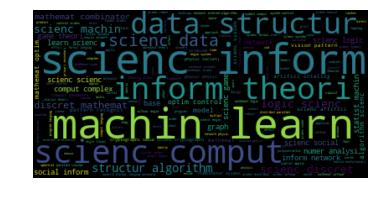

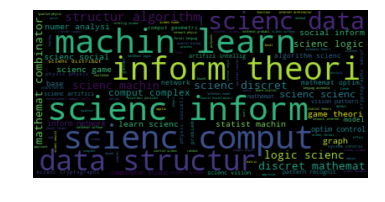

In [34]:
import os

from os import path
from wordcloud import WordCloud

text = ' '.join(map(str,clean_train_words))
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_Vector = TfidfVectorizer(min_df = 0., max_df = 1., use_idf = True)
Tfidf_Matrix = Tfidf_Vector.fit_transform(clean_train_words)
Tfidf_Matrix = Tfidf_Matrix.toarray()
print(np.round(Tfidf_Matrix, 10))

features = Tfidf_Vector.get_feature_names()
Tfidf_df = pd.DataFrame(np.round(Tfidf_Matrix, 10), columns = features)
Tfidf_df

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,abmash,abstract,ac,academ,acceler,access,accumul,accur,accuraci,achiev,...,wrap,write,wrong,xeon,xml,xx,yield,zero,zf,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [20]:
def lemmatize_stemming(text):
    stemmer = PorterStemmer() 
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [22]:
clean_train_words = []

for key, value in h.items():
    clean_train_words.append(" ".join(preprocess(value)))

In [23]:
el = []
for e in clean_train_words:
    el.append(e.split())
    
el

[['smooth',
  'enyi',
  'entropi',
  'ergod',
  'quantum',
  'inform',
  'sourc',
  'quantum',
  'physic',
  'scienc',
  'inform',
  'theori'],
 ['analyz',
  'design',
  'process',
  'experi',
  'anita',
  'gener',
  'tutor',
  'scienc',
  'comput',
  'societi',
  'scienc',
  'human',
  'interact'],
 ['colour',
  'imag',
  'segment',
  'vector',
  'valu',
  'allen',
  'cahn',
  'phase',
  'field',
  'model',
  'multigrid',
  'solut',
  'scienc',
  'vision',
  'pattern',
  'recognit',
  'scienc',
  'numer',
  'analysi'],
 ['unequ',
  'error',
  'protect',
  'inform',
  'theoret',
  'perspect',
  'scienc',
  'inform',
  'theori',
  'scienc',
  'discret',
  'mathemat',
  'mathemat',
  'combinator'],
 ['hit',
  'time',
  'quantum',
  'versu',
  'random',
  'walk',
  'quantum',
  'physic',
  'scienc',
  'data',
  'structur',
  'algorithm'],
 ['cod',
  'theori',
  'algebra',
  'combinator',
  'mathemat',
  'combinator',
  'scienc',
  'inform',
  'theori'],
 ['gener',
  'random',
  'network',

In [24]:
dictionary = gensim.corpora.Dictionary(el)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1

0 entropi
1 enyi
2 ergod
3 inform
4 physic
5 quantum
6 scienc
7 smooth
8 sourc
9 theori
10 analyz
11 anita
12 comput
13 design
14 experi
15 gener
16 human
17 interact
18 process
19 societi
20 tutor
21 allen
22 analysi
23 cahn
24 colour
25 field
26 imag
27 model
28 multigrid
29 numer
30 pattern
31 phase
32 recognit
33 segment
34 solut
35 valu
36 vector
37 vision
38 combinator
39 discret
40 error
41 mathemat
42 perspect
43 protect
44 theoret
45 unequ
46 algorithm
47 data
48 hit
49 random
50 structur
51 time
52 versu
53 walk
54 algebra
55 cod
56 cycl
57 network
58 short
59 kailath
60 schalkwijk
61 theme
62 variat
63 distanc
64 fix
65 paramet
66 rotat
67 tractabl
68 approxim
69 linear
70 certif
71 complex
72 queri
73 classic
74 dimension
75 finit
76 ode
77 principl
78 set
79 uncertainti
80 block
81 decod
82 erasur
83 feedback
84 joint
85 measur
86 multipl
87 recoveri
88 spars
89 artifici
90 automat
91 classif
92 genr
93 intellig
94 inter
95 learn
96 machin
97 music
98 similar
99 sound
100 

1158 quadrat
1159 buffer
1160 imperfect
1161 throughput
1162 blue
1163 dart
1164 speak
1165 distinguish
1166 neighbour
1167 affin
1168 canon
1169 pseudorandom
1170 balanc
1171 discontinu
1172 festung
1173 galerkin
1174 matlab
1175 octav
1176 toolbox
1177 challeng
1178 permiss
1179 laplac
1180 page
1181 angl
1182 flat
1183 fold
1184 prescrib
1185 gpgpu
1186 equilbria
1187 vote
1188 solvabl
1189 indoor
1190 multipath
1191 level
1192 overhang
1193 epistem
1194 polynom
1195 apal
1196 purif
1197 expon
1198 cospars
1199 ell_p
1200 work
1201 benchmark
1202 suit
1203 templat
1204 clean
1205 imposs
1206 qubit
1207 barcelona
1208 flag
1209 polit
1210 prefer
1211 secessionist
1212 upper
1213 dataset
1214 renoir
1215 myopic
1216 poisson
1217 convolut
1218 hierarch
1219 earli
1220 nand
1221 straight
1222 chain
1223 curvatur
1224 ricci
1225 lazi
1226 decoupl
1227 multivari
1228 stratif
1229 coalit
1230 inequ
1231 volum
1232 serendip
1233 jointli
1234 nearli
1235 pack
1236 solver
1237 decompos
1238 e

In [25]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)


In [26]:
bow_corpus = [dictionary.doc2bow(doc) for doc in el]


In [27]:
bow_corpus

[[(0, 2), (1, 1), (2, 2), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(0, 2), (3, 1), (15, 1), (16, 1), (17, 2)],
 [(1, 1), (2, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(0, 1), (3, 2), (15, 2), (17, 1), (23, 1), (24, 1)],
 [(0, 1), (3, 1), (6, 1), (18, 1), (19, 1), (20, 1), (21, 1), (25, 1)],
 [(0, 1), (3, 1)],
 [(18, 1), (19, 1), (21, 1)],
 [(18, 2), (19, 1), (21, 1), (22, 1), (26, 1), (27, 1)],
 [(1, 1), (2, 2), (4, 1), (28, 2)],
 [(0, 1), (3, 1), (9, 1), (17, 1), (29, 1), (30, 1)],
 [(0, 1), (3, 1), (24, 1)],
 [(0, 1), (3, 1), (31, 1), (32, 1), (33, 1)],
 [(10, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(4, 1), (28, 1), (39, 1), (40, 1)],
 [(1, 1), (2, 2), (4, 1), (41, 1), (42, 1), (43, 1)],
 [(17, 1), (44, 1), (45, 2)],
 [(25, 1), (46, 1), (47, 1)],
 [(25, 1), (46, 1), (47, 1)],
 [(25, 2), (46, 1), (47, 1), (48, 1)],
 [(25, 2), (46, 1), (47, 1)],
 [(25, 2), (46, 1), (47, 1)],
 [(0, 1), (3, 2), (10

In [28]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3609595430347238),
 (1, 0.31341743858980564),
 (2, 0.8625304190616317),
 (3, 0.16588849771257375)]


### Running LDA using Bag of Words

Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

        

In [30]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [31]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.123*"theori" + 0.060*"network" + 0.058*"automata" + 0.054*"logic" + 0.051*"game" + 0.051*"languag" + 0.045*"formal" + 0.038*"internet" + 0.038*"architectur" + 0.037*"mathemat"
Topic: 1 
Words: 0.081*"mathemat" + 0.053*"analysi" + 0.053*"learn" + 0.047*"machin" + 0.047*"secur" + 0.045*"comput" + 0.043*"numer" + 0.042*"cryptographi" + 0.040*"theori" + 0.039*"statist"
Topic: 2 
Words: 0.133*"algorithm" + 0.104*"structur" + 0.099*"data" + 0.084*"comput" + 0.038*"distribut" + 0.033*"graph" + 0.030*"cluster" + 0.029*"parallel" + 0.028*"theori" + 0.027*"languag"
Topic: 3 
Words: 0.129*"inform" + 0.113*"theori" + 0.057*"system" + 0.045*"quantum" + 0.042*"network" + 0.041*"physic" + 0.026*"comput" + 0.026*"control" + 0.019*"mathemat" + 0.018*"dynam"
Topic: 4 
Words: 0.067*"algorithm" + 0.060*"data" + 0.057*"mathemat" + 0.054*"artifici" + 0.054*"intellig" + 0.050*"structur" + 0.038*"comput" + 0.033*"secondari" + 0.032*"primari" + 0.029*"probabl"
Topic: 5 
Words: 0.095*"physic"

### Running LDA using TF-IDF


In [32]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.082*"algorithm" + 0.073*"data" + 0.071*"structur" + 0.033*"theori" + 0.029*"time" + 0.028*"inform" + 0.027*"method" + 0.026*"group" + 0.025*"comput" + 0.023*"statist"
Topic: 1 Word: 0.087*"inform" + 0.082*"theori" + 0.066*"channel" + 0.039*"secondari" + 0.039*"primari" + 0.036*"system" + 0.034*"physic" + 0.033*"game" + 0.031*"function" + 0.029*"cod"
Topic: 2 Word: 0.076*"mathemat" + 0.064*"discret" + 0.064*"combinator" + 0.044*"graph" + 0.043*"analysi" + 0.039*"numer" + 0.037*"softwar" + 0.032*"engin" + 0.031*"theori" + 0.026*"game"
Topic: 3 Word: 0.094*"complex" + 0.056*"mathemat" + 0.055*"comput" + 0.055*"probabl" + 0.044*"secur" + 0.040*"cryptographi" + 0.029*"theori" + 0.029*"discret" + 0.029*"problem" + 0.029*"combinator"
Topic: 4 Word: 0.074*"control" + 0.067*"optim" + 0.046*"system" + 0.038*"inform" + 0.036*"theori" + 0.035*"physic" + 0.030*"mathemat" + 0.029*"bound" + 0.026*"societi" + 0.023*"commun"
Topic: 5 Word: 0.061*"comput" + 0.059*"geometri" + 0.057*"qua

### Performance evaluation by classifying sample document using LDA TF-IDF model.

In [33]:
for index, score in sorted(lda_model_tfidf[bow_corpus[900]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8499809503555298	 
Topic: 0.061*"comput" + 0.059*"geometri" + 0.057*"quantum" + 0.056*"algorithm" + 0.047*"data" + 0.046*"structur" + 0.044*"mathemat" + 0.031*"algebra" + 0.029*"cluster" + 0.029*"discret"

Score: 0.016673041507601738	 
Topic: 0.094*"complex" + 0.056*"mathemat" + 0.055*"comput" + 0.055*"probabl" + 0.044*"secur" + 0.040*"cryptographi" + 0.029*"theori" + 0.029*"discret" + 0.029*"problem" + 0.029*"combinator"

Score: 0.01666920818388462	 
Topic: 0.074*"control" + 0.067*"optim" + 0.046*"system" + 0.038*"inform" + 0.036*"theori" + 0.035*"physic" + 0.030*"mathemat" + 0.029*"bound" + 0.026*"societi" + 0.023*"commun"

Score: 0.016668755561113358	 
Topic: 0.043*"cod" + 0.039*"inform" + 0.037*"artifici" + 0.037*"intellig" + 0.030*"detect" + 0.027*"base" + 0.024*"network" + 0.024*"gener" + 0.024*"recognit" + 0.023*"financ"

Score: 0.016668524593114853	 
Topic: 0.087*"inform" + 0.082*"theori" + 0.066*"channel" + 0.039*"secondari" + 0.039*"primari" + 0.036*"system" + 0.034